
# Introducción

En el siguiente notebook comenzamos a tratar el dataset con la información de los pacientes del departamento de cardiología. 
Primero haremos un analisis de las variables y el dataset y luego generaremos modelos para predecir los pacientes con patologías cardiacas.


# Carga del dataset

In [ ]:
# importamos las diferentes librerias utilizadas para el estudio de los datos 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno        # libreria para ver datos missing en nuestro data set


%matplotlib inline

In [ ]:
from google.colab import files # cargamos el archivo en el notebook
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

# Comprensión de los datos

**Variables:**

* Age: la edad del paciente.
* Sex: el sexo del paciente (1 = hombre y 0 = mujer).
* Cp: equivalente a tipo de dolor en el pecho siendo ( 0 = angina típica, 1 = angina no frecuente, 2 = ausencia de dolor anginal y 3 = asintomático).
* Trestbps: presión arterial en estado de reposo.
* Chol: el nivel de colesterol en sangre del paciente.
* Fbs: niveles de azúcar en sangre tras ayuno. Midiendo si son bajos o altos (0= no y 1 = sí).
* Restecg: resultados del electro cardiograma siendo ( 0 = normal, 1 = una pequeña deformidad y 2 = indica una hipertrofia en los ventrículos).
* Thalach: corresponde al pico más alto de pulso cardiaco registrado al paciente.
* Exang: dolor anginal por deporte ( 1 = sí y 0 = no)
* Oldpeak: el cambio de ritmo entre ejercicio y reposo.
* Slope: la pendiente del cambio en el cambio de ejercicio a reposo.
* Ca: tamaño de los vasos sanguíneos puede ir de (0 a 3)
* Thal: hace referencia a la enfermedad talasemia que afecta al flujo sanguíneo. (1 = talasemia controlada, 2 = padece talasemia, 3 = normal) 
* Target: este campo indica si el paciente sufre o no una insuficiencia cardiaca.


# Limpieza Dataset

In [ ]:
df.head(4) # Compruebo que el data frame se ha cargado correctamente

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [ ]:
print(df.shape) #veo que están todas sus filas y columnas
print ("Filas     : " ,df.shape[0])
print ("Columnas  : " ,df.shape[1])

(303, 14)
Filas     :  303
Columnas  :  14


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.nunique() # revisamos que todos los datos están bien cargados, que corresponde dos valores a los datos boolyanos o que corresponde con los metadatos

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df['ca'].unique() #el campo 'ca' solo debe tener tres valores por tanto veo cual es el que sobra y lo quito.


array([0, 2, 1, 3, 4])

In [ ]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [ ]:
df[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [ ]:
df.loc[df['ca']==4, 'ca'] = np.NaN #subtituyo por vacio los campos que están mal informados

In [ ]:
df['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [ ]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [ ]:
df.loc[df['thal']==0, 'thal'] = np.NaN #hago lo mismo con con el campo 'thal' que tiene tres valores y aparecen cuatro en el df

In [ ]:
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
df['thal'].unique() #compruebo que se ha substituido correctamente

array([ 1.,  2.,  3., nan])

In [ ]:
df.isnull().sum() #antes no tenía nulos pero ahora sí al haber borrado los valores erróneos

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

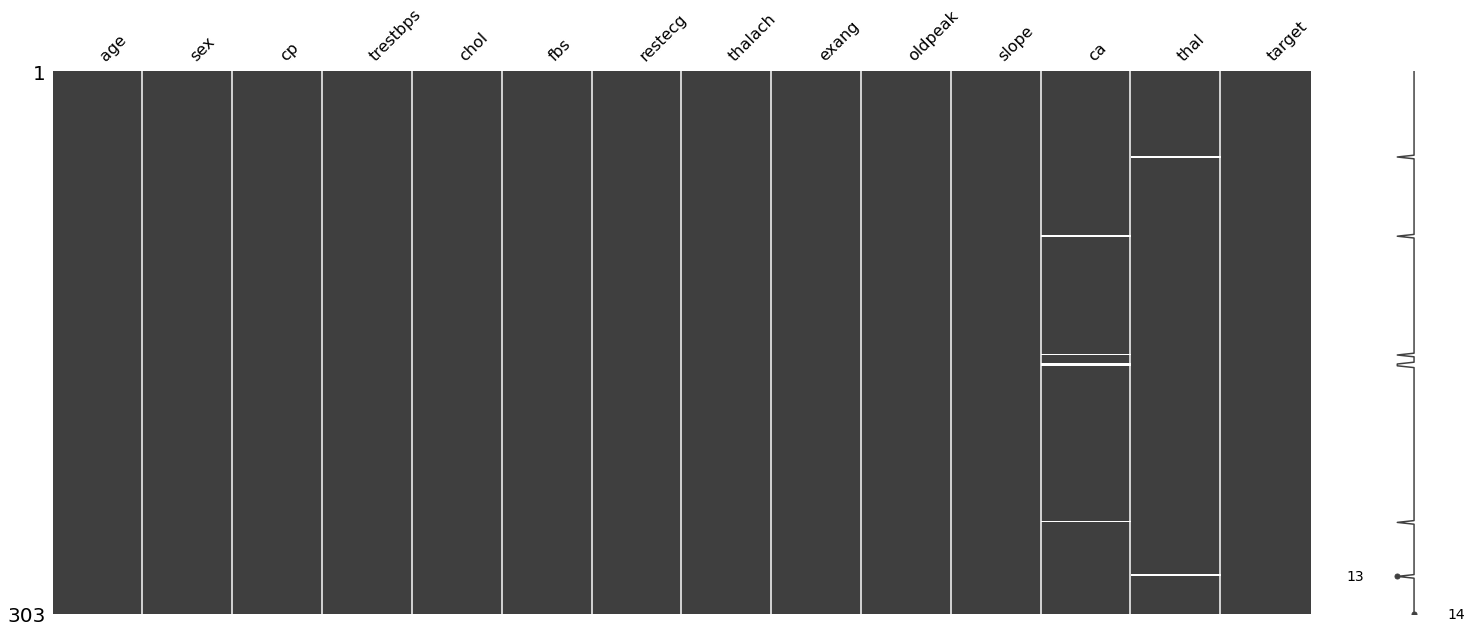

In [ ]:
msno.matrix(df) #con la ayuda de la librería missingno veo de una forma visual los campos vacios.

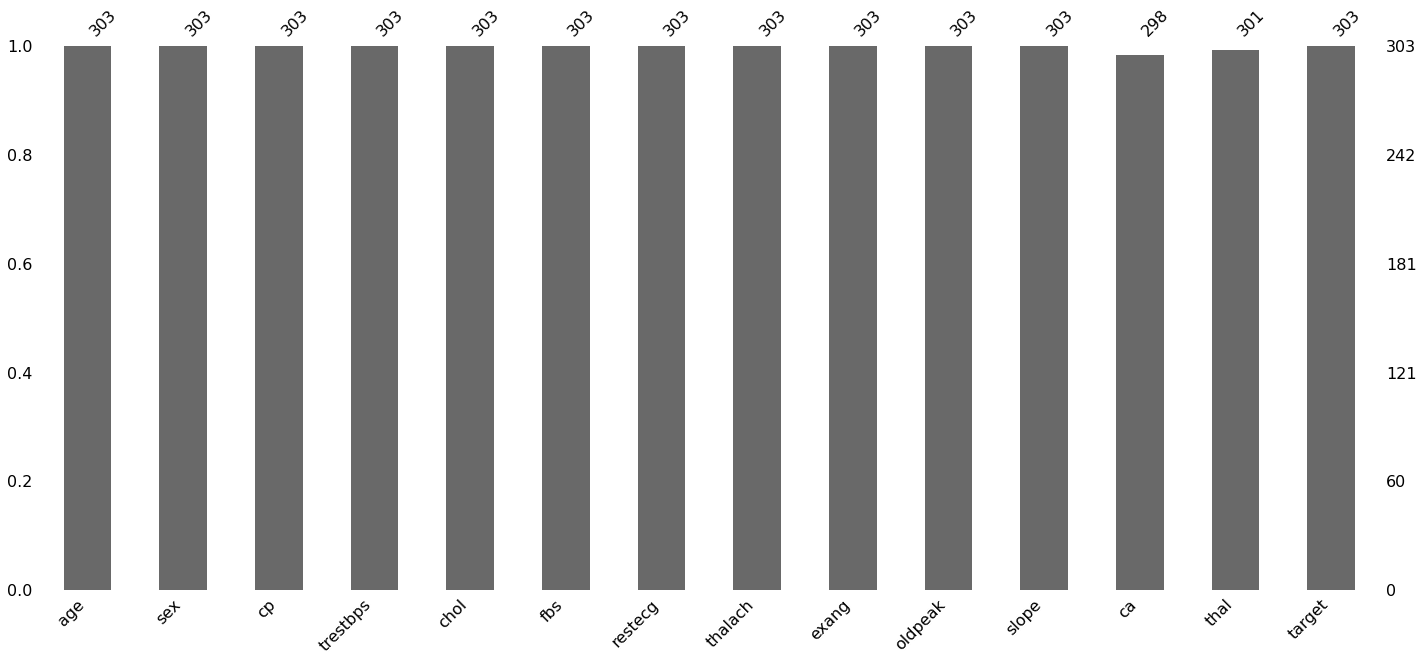

In [ ]:
msno.bar(df) 

In [ ]:
df = df.fillna(df.median()) # para hacer un buen estudio y modelos predictivos relleno los nulos con la mediana de esos valores
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# ahora ya tengo los datos completos y no hay vacios, debo comprobar si se repiten algunas líneas en el dataset.
# con la siguiente formula puedo ver cuantos duplicados tengo indicandole que me muestre en pantalla la suma de todos los duplicados.

duplicados = df.duplicated().sum() 
if duplicados:
  print('Líneas duplicadas en el dataset: {}'.format(duplicados))
else:
  print('El dataset no tiene duplicados')

Líneas duplicadas en el dataset: 1


In [ ]:
duplicados = df[df.duplicated(keep=False)]
duplicados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [ ]:
df = df.drop_duplicates() #elimino la línea duplicada

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 302, dtype: bool

In [ ]:
df.describe() # ya tengo mi data set completamente limpio y sin duplicados. Hago un breve resumen estadístico de cada variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.665563,2.327815,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.935142,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


# Manipulación de variables

In [ ]:
# Con motivo de hacerlo más comprensible sustituyo los valores numéricos por lo que representan para ser más explicativo.

df['target'] = df.target.replace({1: "patología", 0: "sin_patología"})
df['sex'] = df.sex.replace({1: "Hombre", 0: "Mujer"})
df['cp'] = df.cp.replace({0: "angina_tipica", 
                          1: "no_frecuente_angina", 
                          2:"sin_dolor_angina",
                          3: "asintomático"})
df['exang'] = df.exang.replace({1: "sí", 0: "no"})
df['fbs'] = df.fbs.replace({1: "sí", 0: "no"})
df['slope'] = df.slope.replace({0: "ascendente", 1: "plano",2:"descendente"})
df['thal'] = df.thal.replace({1: "tala_control", 2: "talasemia", 3:"normal"})

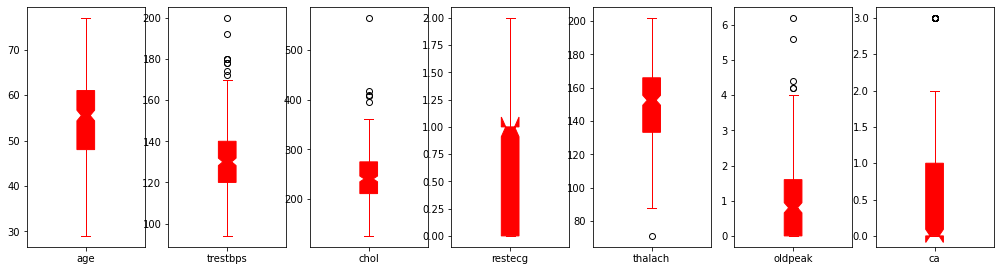

In [ ]:
# las variables continuas las muestro en unos box plots para tener mayores insights y ver como se distribuyen.
df.plot(kind='box', subplots=True, layout=(3,12),
sharex=False,sharey=False,notch=True,patch_artist=True, figsize=(30, 15), color='red');


# Comportamiento de las variables respecto al target

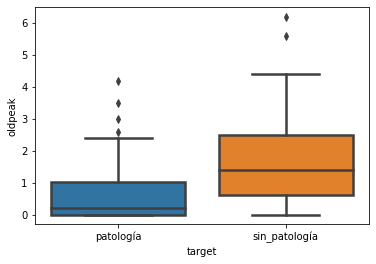

In [ ]:
#hago lo mismo pero con la librería seaborn ya que en mi opinión se entiende mejor.
# y respecto al target
sns.boxplot(x='target', y='oldpeak', data=df, linewidth=2.5)


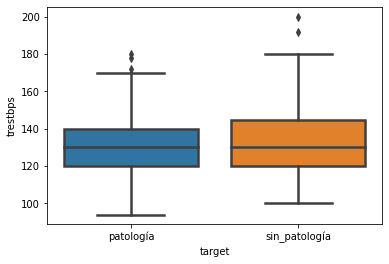

In [ ]:
sns.boxplot(x='target', y='trestbps', data=df, linewidth=2.5)


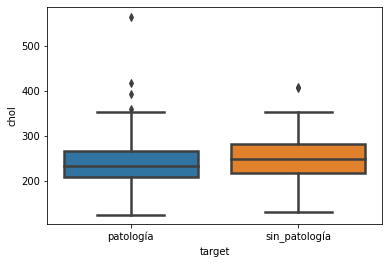

In [ ]:
sns.boxplot(x='target', y='chol', data=df, linewidth=2.5)


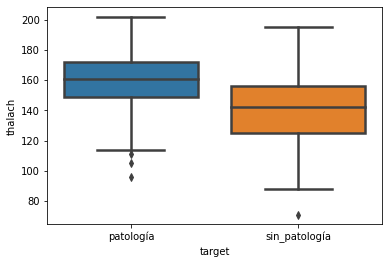

In [ ]:
sns.boxplot(x='target', y='thalach', data=df, linewidth=2.5)


# Elimino outliers

In [ ]:
# En los anteriores Box plots se muestra que alguna de las variables tienen outliers.
# Procedo a limpiar los outliers con un parametro de 1.5 respecto al área interquartil.
variables_continuas = ['age','trestbps','chol','thalach','oldpeak']  # defino las variables continuas que quiero limpiar
def outliers(df_out, drop = False):
    for x in df_out.columns:
        datos = df_out[x]
        Q1 = np.percentile(datos, 25.) # Calculamos los quartiles
        Q3 = np.percentile(datos, 75.) 
        IQR = Q3-Q1 #Calculo el área intercuartil
        outilier_detectado = IQR * 1.5 #Por definición tomo una distancia de 1,5 respecto al área intercuartil
        outliers = datos[~((datos >= Q1 - outilier_detectado) & (datos <= Q3 + outilier_detectado))].index.tolist()  
        if not drop:
            print('La variable {}, tiene tantos outliers {}'.format(x, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers eliminados de {} '.format(x))

outliers(df[variables_continuas])


La variable age, tiene tantos outliers 0
La variable trestbps, tiene tantos outliers 9
La variable chol, tiene tantos outliers 5
La variable thalach, tiene tantos outliers 1
La variable oldpeak, tiene tantos outliers 5


In [ ]:
outliers(df[variables_continuas], drop=True)

Outliers eliminados de age 
Outliers eliminados de trestbps 
Outliers eliminados de chol 
Outliers eliminados de thalach 
Outliers eliminados de oldpeak 


# Distribución de la variable target

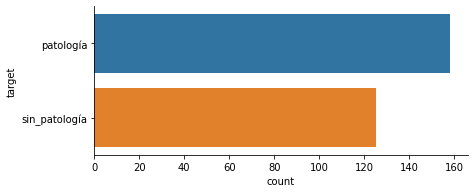

In [ ]:
ax = sns.catplot(y="target", kind="count", data=df, height=2.6, aspect=2.5 )



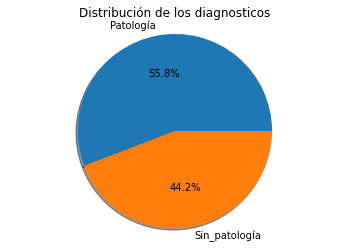

In [ ]:
# pie chart del target
labels = ['Patología','Sin_patología']
sizes = [df['target'].value_counts()[0],
         df['target'].value_counts()[1],
                ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels , autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.title.set_text('Distribución de los diagnosticos')
plt.show()

# Distribución de variables continuas

Text(0.5, 1.0, 'Distribución de la edad')

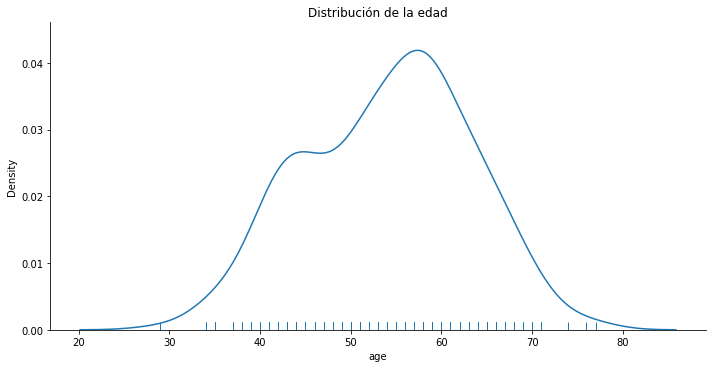

In [ ]:
sns.displot(df, x="age", kind="kde", rug=True, aspect=2)
plt.title('Distribución de la edad')


Text(0.5, 1.0, 'Distribución de la edad')

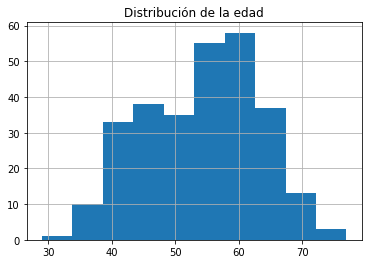

In [ ]:
df['age'].hist().plot(kind='bar')
plt.title('Distribución de la edad')

Text(0.5, 1.0, 'Distribución del colesterol')

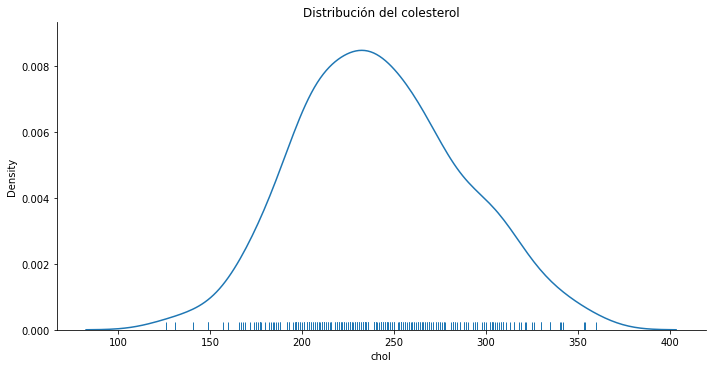

In [ ]:
sns.displot(df, x="chol", kind="kde", rug=True, aspect=2)
plt.title('Distribución del colesterol')


Text(0.5, 1.0, 'Distribución del colesterol')

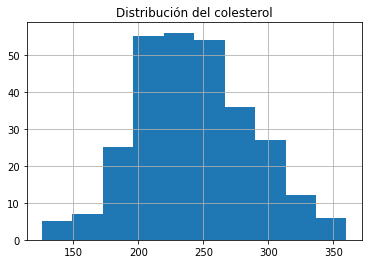

In [ ]:
df['chol'].hist().plot(kind='bar')
plt.title('Distribución del colesterol')

Text(0.5, 1.0, 'Distribución por oldpeak')

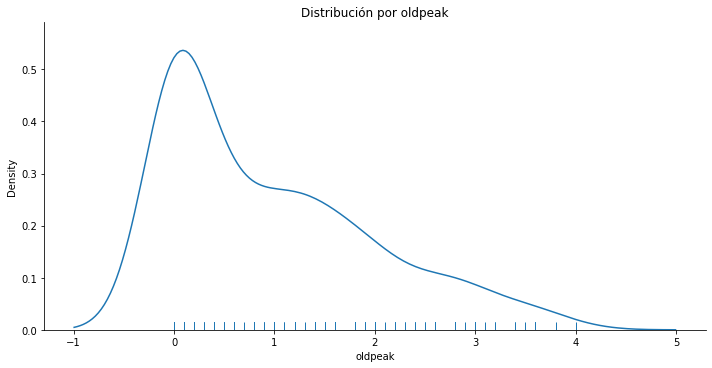

In [ ]:
sns.displot(df, x="oldpeak", kind="kde", rug=True, aspect=2)
plt.title('Distribución por oldpeak')

Text(0.5, 1.0, 'Distribución por oldpeak')

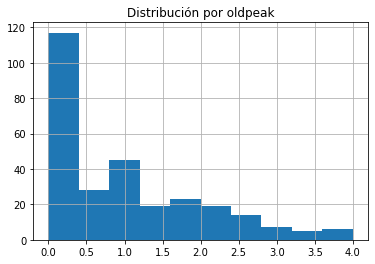

In [ ]:
df['oldpeak'].hist().plot(kind='bar')
plt.title('Distribución por oldpeak')

Text(0.5, 1.0, 'Distribución por pulsaciones pico')

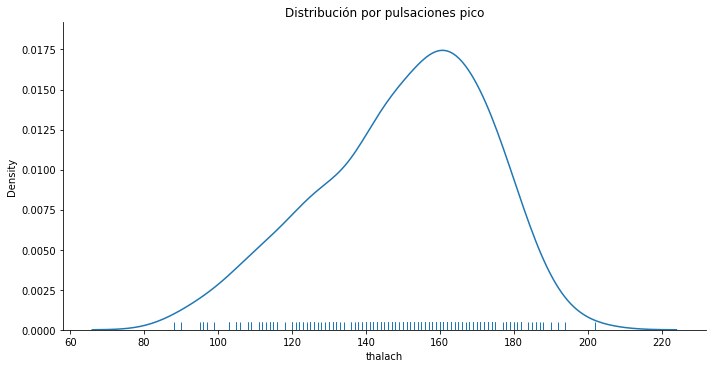

In [ ]:
sns.displot(df, x="thalach", kind="kde", rug=True, aspect=2)
plt.title('Distribución por pulsaciones pico')

Text(0.5, 1.0, 'Distribución por pulsaciones pico')

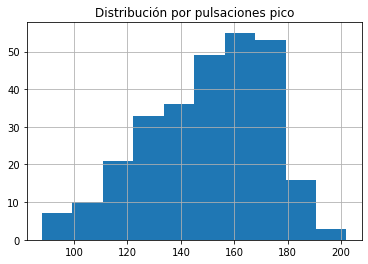

In [ ]:
df['thalach'].hist().plot(kind='bar')
plt.title('Distribución por pulsaciones pico')

Text(0.5, 1.0, 'Distribución por pulsaciones en reposo ')

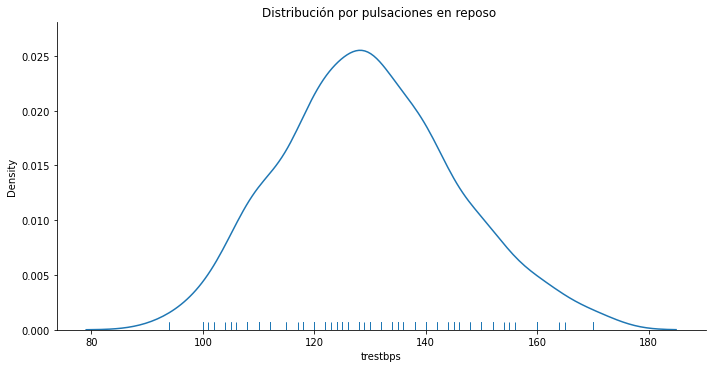

In [ ]:
sns.displot(df, x="trestbps", kind="kde", rug=True, aspect=2)
plt.title('Distribución por pulsaciones en reposo ')

Text(0.5, 1.0, 'Distribución por pulsaciones en reposo ')

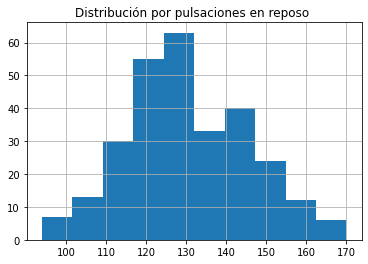

In [ ]:
df['trestbps'].hist().plot(kind='bar')
plt.title('Distribución por pulsaciones en reposo ')

# Distribución del target por variables categóricas

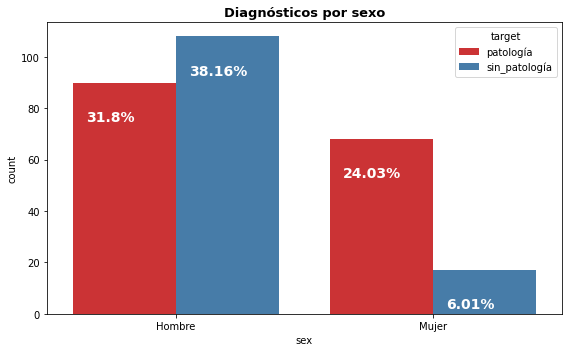

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
name = ["Hombre", "Mujer"]
ax = sns.countplot(x='sex', hue='target', data=df, palette='Set1')
ax.set_title("Diagnósticos por sexo", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

Text(0.5, 1.0, 'Diagnósticos por sexo')

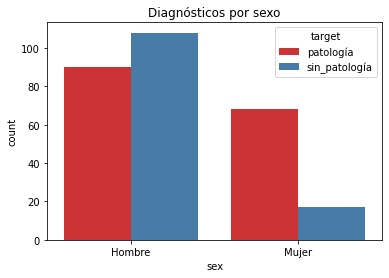

In [ ]:
sns.countplot(x='sex', hue='target', data=df, palette='Set1').set_title('Diagnósticos por sexo') #compruebo la distribución de las columnas

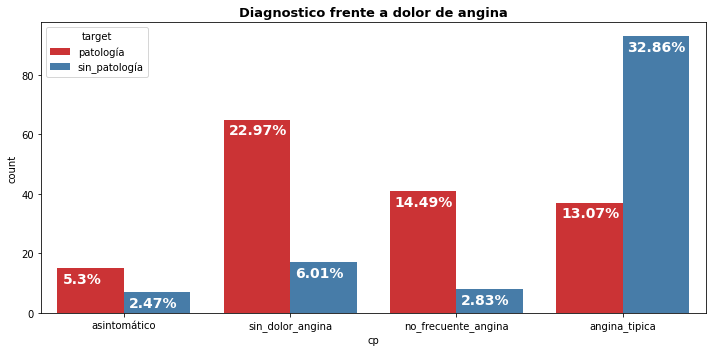

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
name = ["asintomático", "sin_dolor_angina", "no_frecuente_angina","angina_tipica"]
ax = sns.countplot(x='cp', hue='target', data=df, palette='Set1')
ax.set_title("Diagnostico frente a dolor de angina", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

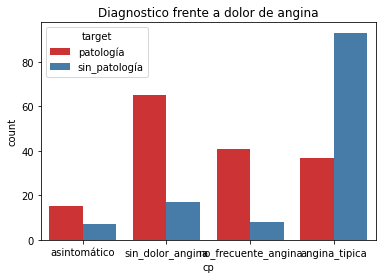

In [ ]:
sns.countplot(x='cp', hue='target', data=df, palette='Set1').set_title('Diagnostico frente a dolor de angina')
sns.set(rc={'figure.figsize':(15,8.27)}) #compruebo la distribución de las columnas

In [ ]:
df['exang']

0      no
1      no
2      no
3      no
4      sí
       ..
298    sí
299    no
300    no
301    sí
302    no
Name: exang, Length: 283, dtype: object

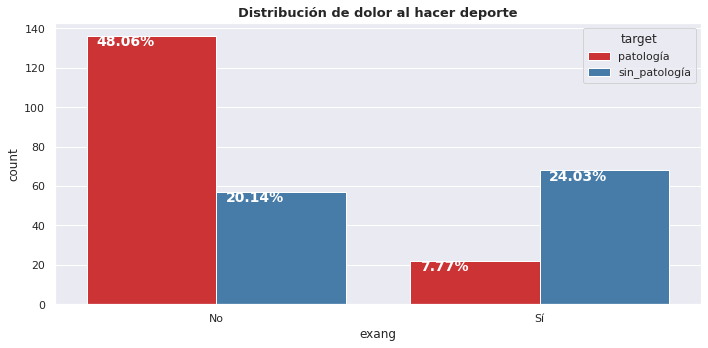

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
name = ["No","Sí"]
ax = sns.countplot(x='exang', hue='target', data=df, palette='Set1')
ax.set_title("Distribución de dolor al hacer deporte", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

Text(0.5, 1.0, 'Distribución de dolor al hacer deporte')

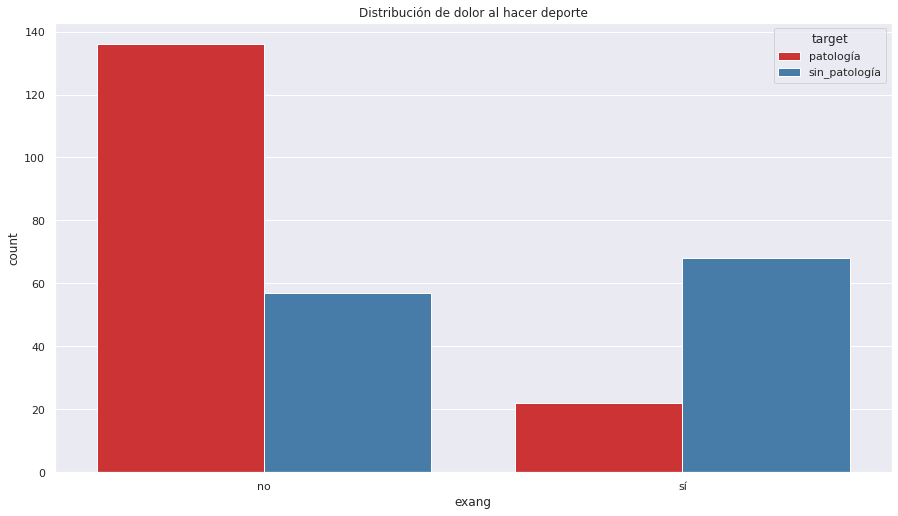

In [ ]:
sns.countplot(x='exang', hue='target', data=df, palette='Set1').set_title('Distribución de dolor al hacer deporte') #compruebo la distribución de las columnas

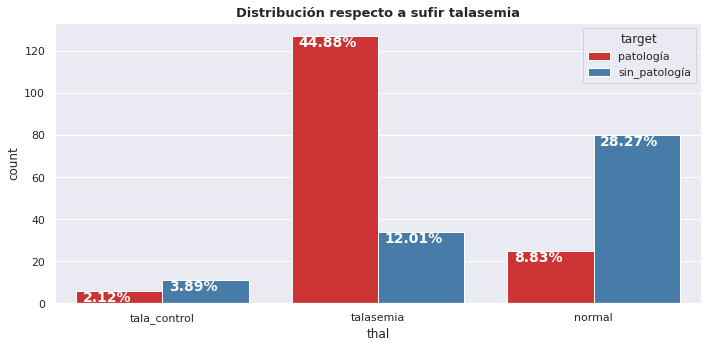

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
name = ["tala_control","talasemia","normal"]
ax = sns.countplot(x='thal', hue='target', data=df, palette='Set1')
ax.set_title("Distribución respecto a sufir talasemia", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

Text(0.5, 1.0, 'Distribución respecto a sufir talasemia')

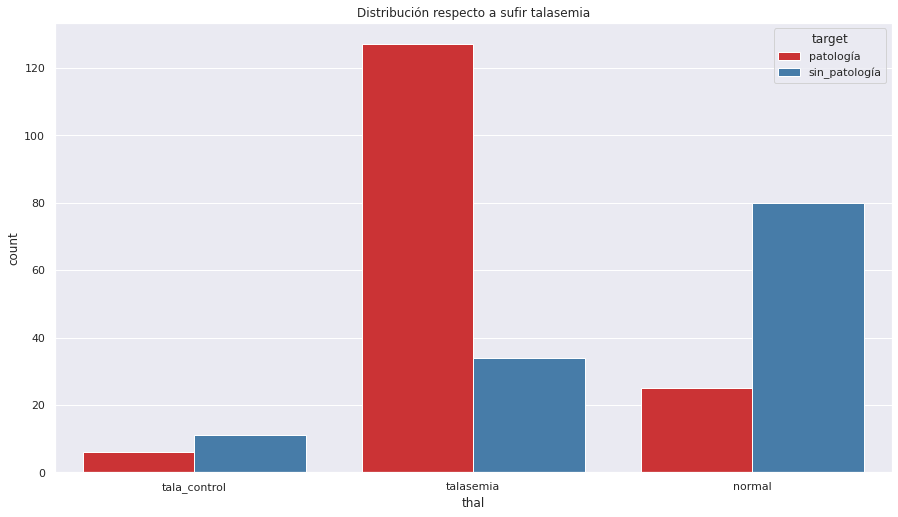

In [ ]:
sns.countplot(x='thal', hue='target', data=df, palette='Set1').set_title('Distribución respecto a sufir talasemia') #compruebo la distribución de las columnas

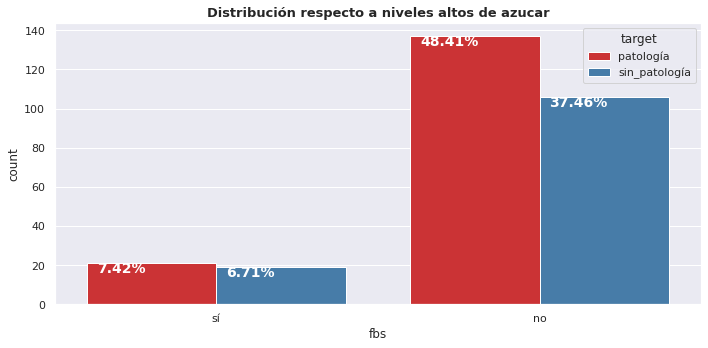

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
name = df['fbs']
ax = sns.countplot(x='fbs', hue='target', data=df, palette='Set1')
ax.set_title("Distribución respecto a niveles altos de azucar", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

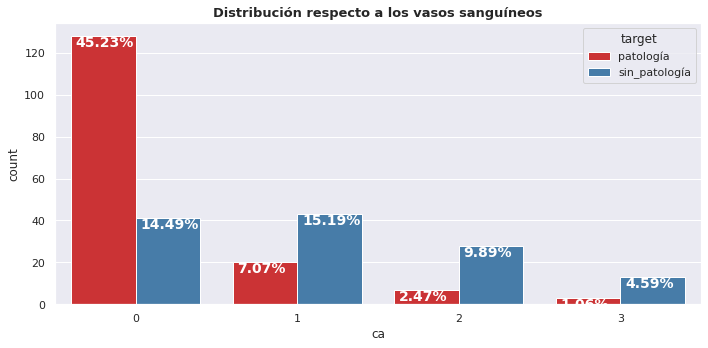

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
name = ["0","1","2","3"]
ax = sns.countplot(x='ca', hue='target', data=df, palette='Set1')
ax.set_title("Distribución respecto a los vasos sanguíneos", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

Text(0.5, 1.0, 'Distribución respecto a los vasos sanguíneos')

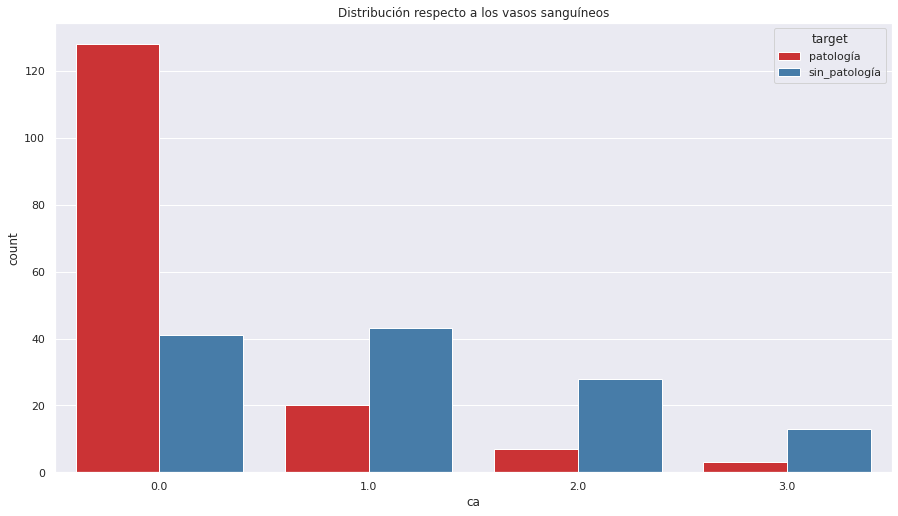

In [ ]:
sns.countplot(x='ca', hue='target', data=df, palette='Set1').set_title('Distribución respecto a los vasos sanguíneos') #compruebo la distribución de las columnas

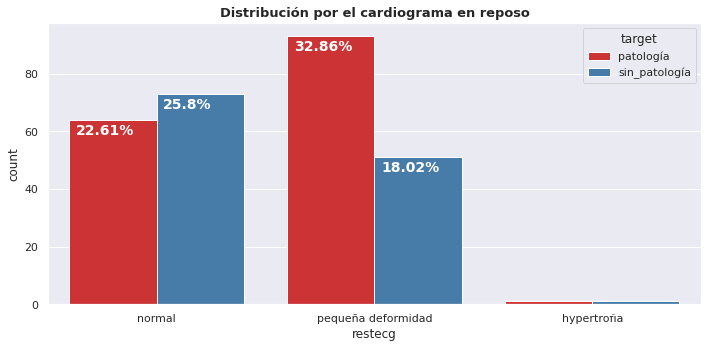

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
name = ["normal","pequeña deformidad","hypertrofia",]
ax = sns.countplot(x='restecg', hue='target', data=df, palette='Set1')
ax.set_title("Distribución por el cardiograma en reposo", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

Text(0.5, 1.0, 'Distribución por el cardiograma en reposo')

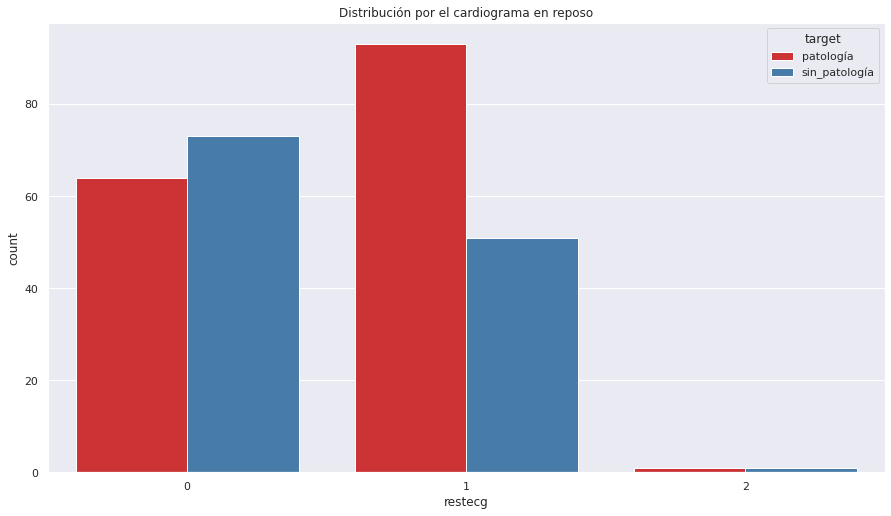

In [ ]:
sns.countplot(x='restecg', hue='target', data=df, palette='Set1').set_title('Distribución por el cardiograma en reposo') #compruebo la distribución de las columnas

# Representación conjunta de las variables

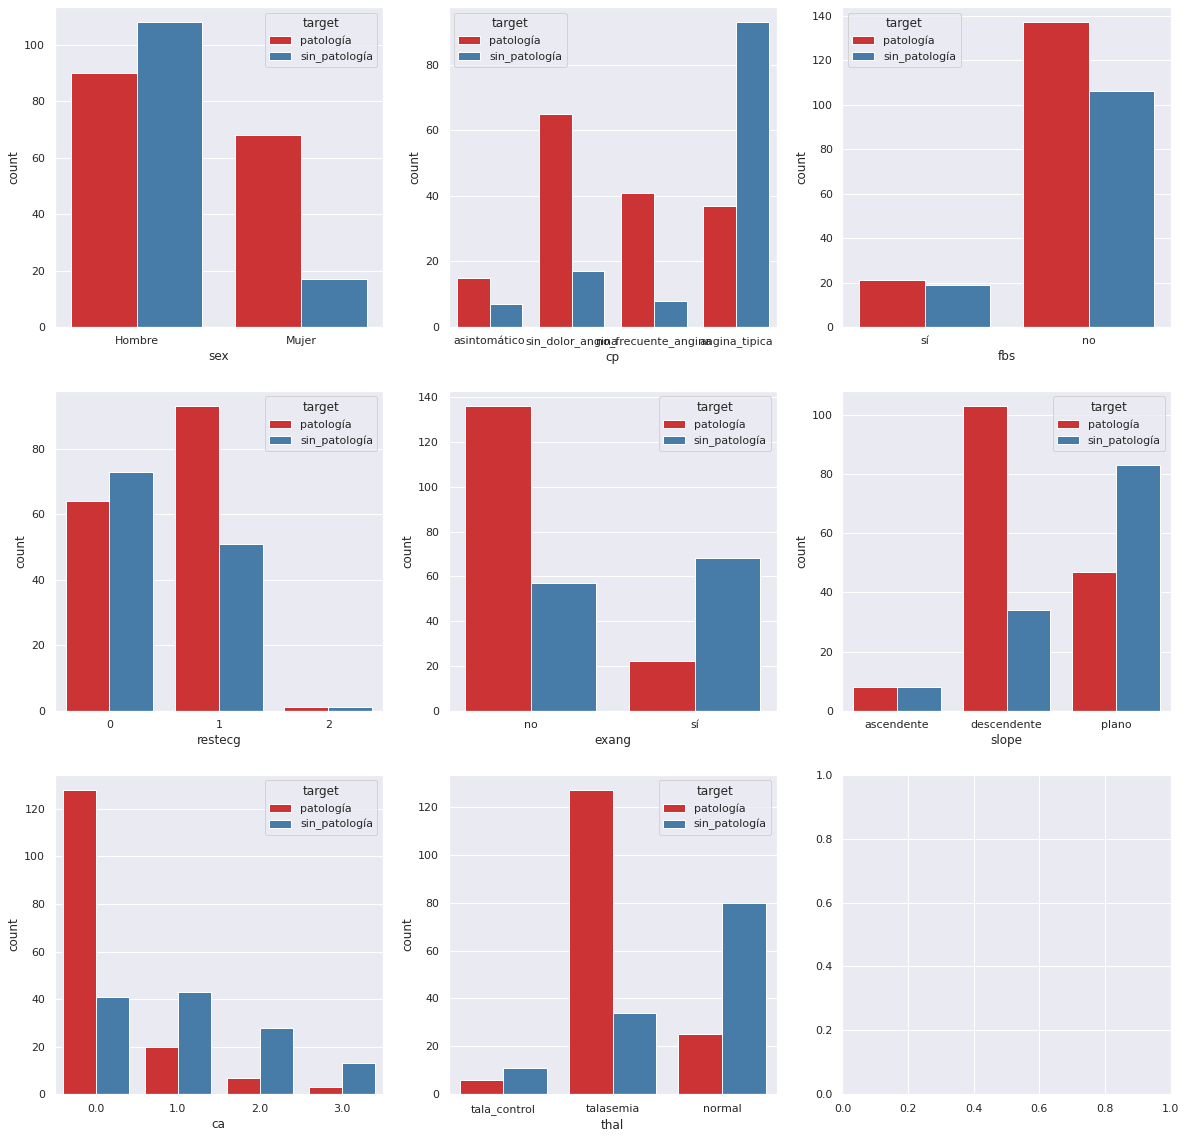

In [ ]:

#Podemos representar todas la variables categóricas directamente en una matriz 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
var_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(var_cat):
    ax = axes[int(idx/3), idx%3]
    if feature != 'target':
        sns.countplot(x=feature, hue='target', data=df, ax=ax, palette='Set1')

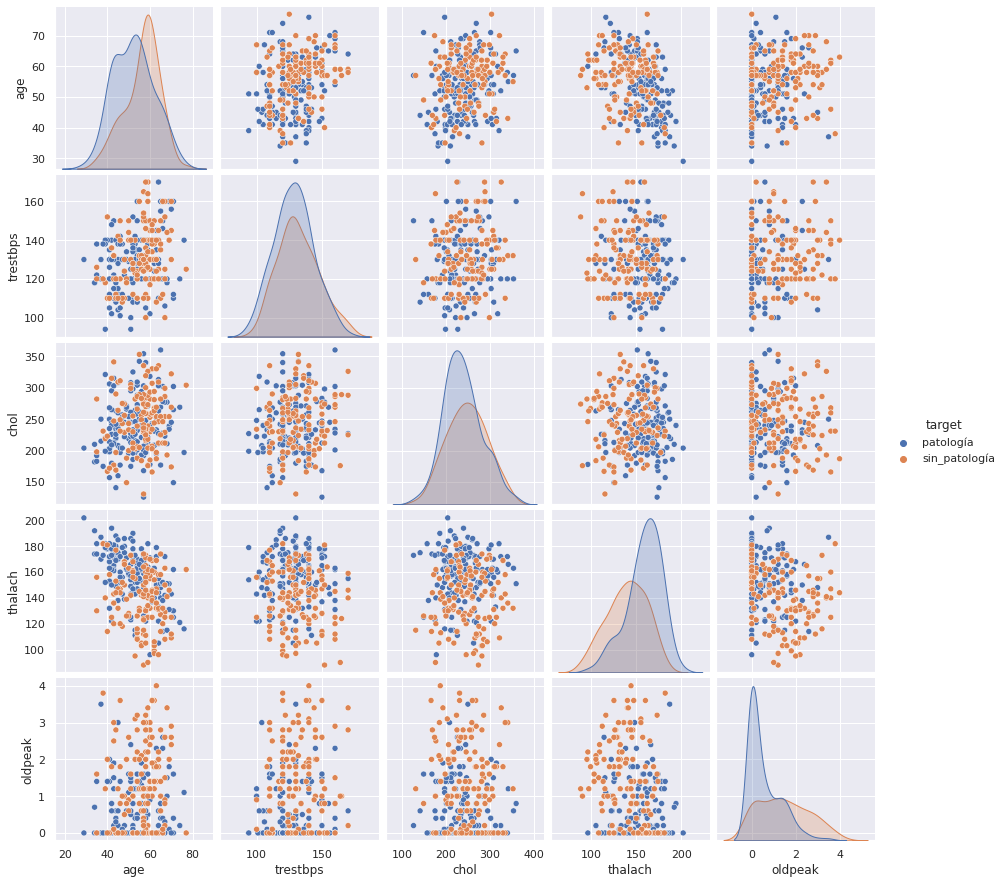

In [ ]:
# Podemos hacer lo mismo para las variables continuas a través de un pairplot
variables_continuas = ['age','trestbps','chol','thalach','oldpeak']
sns.pairplot(df[variables_continuas + ['target']], hue='target')

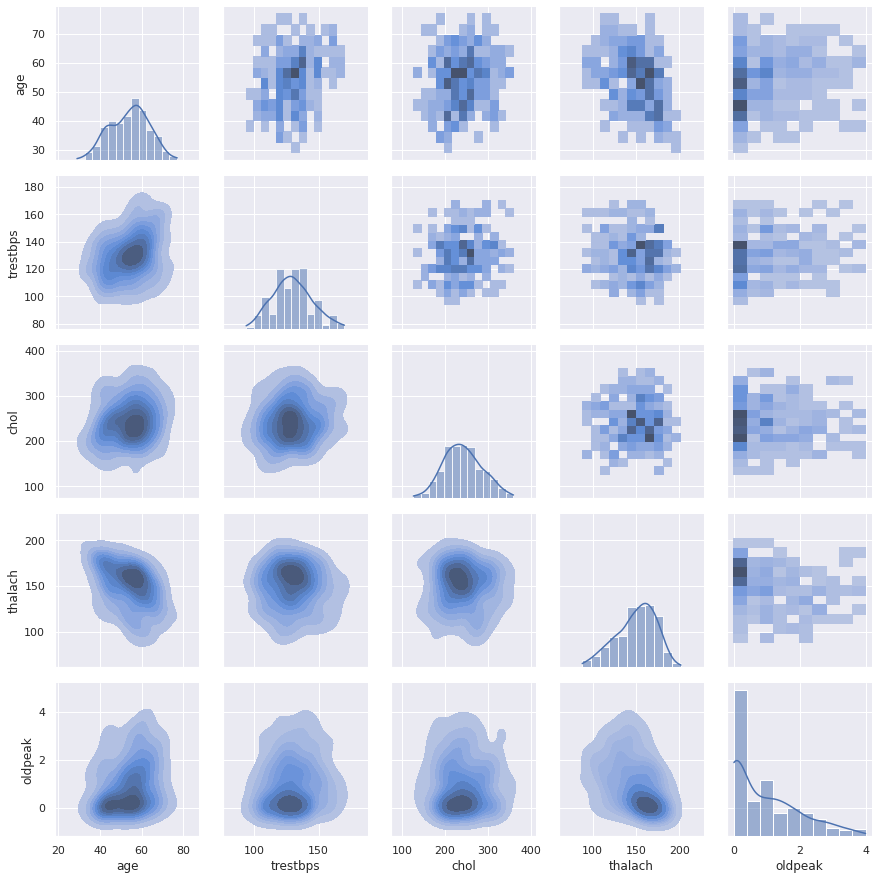

In [ ]:
#esta es otra forma de ver la distribución de las variables similar a un mapa de calor

g = sns.PairGrid(df[variables_continuas + ['target']])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

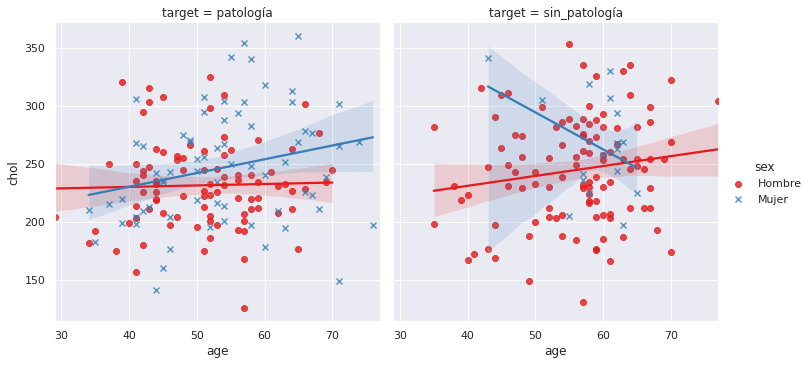

In [ ]:
# Aqui apreciamos la distribución de si sufre o no patología cardiaca respecto a sexo y la edad, dividido por diagóstico
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           markers=["o", "x"],
           palette="Set1",
           data=df)
plt.show()

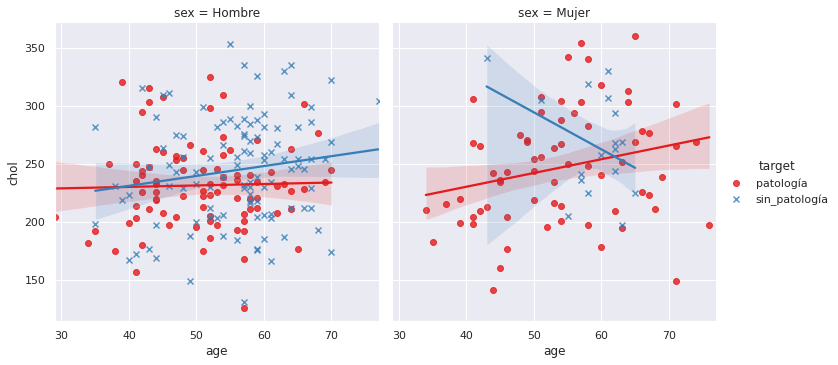

In [ ]:
## Aqui apreciamos la distribución de si sufre o no patología cardiaca respecto a sexo y la edad, dividido por sexo
sns.lmplot(x="age", y="chol", hue="target", col="sex",markers=["o", "x"],palette="Set1",data=df)
plt.show()

In [ ]:
corrMatrix = df.corr()
print (corrMatrix)

               age  trestbps      chol   restecg   thalach   oldpeak        ca
age       1.000000  0.282669  0.171015 -0.110517 -0.411108  0.209254  0.392130
trestbps  0.282669  1.000000  0.115138 -0.139228 -0.071600  0.144438  0.101059
chol      0.171015  0.115138  1.000000 -0.142285 -0.020128 -0.009534  0.124800
restecg  -0.110517 -0.139228 -0.142285  1.000000  0.089556 -0.089255 -0.126825
thalach  -0.411108 -0.071600 -0.020128  0.089556  1.000000 -0.341190 -0.296480
oldpeak   0.209254  0.144438 -0.009534 -0.089255 -0.341190  1.000000  0.245318
ca        0.392130  0.101059  0.124800 -0.126825 -0.296480  0.245318  1.000000


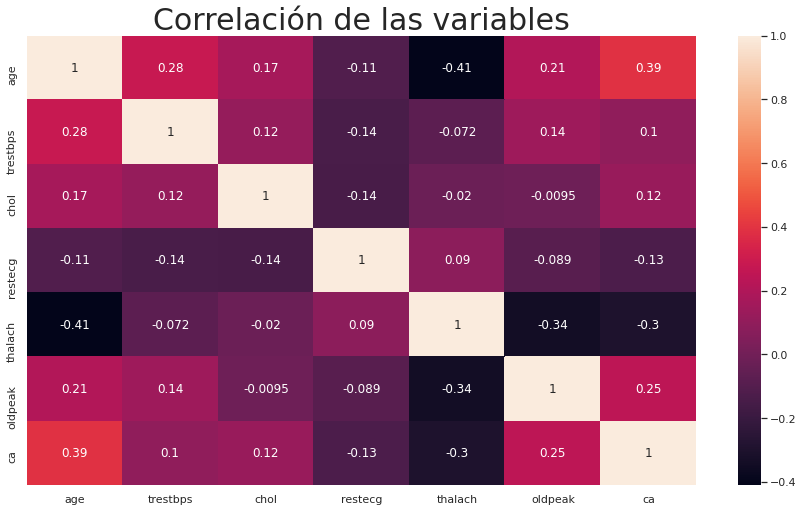

In [ ]:
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlación de las variables', fontsize = 30)
plt.show()

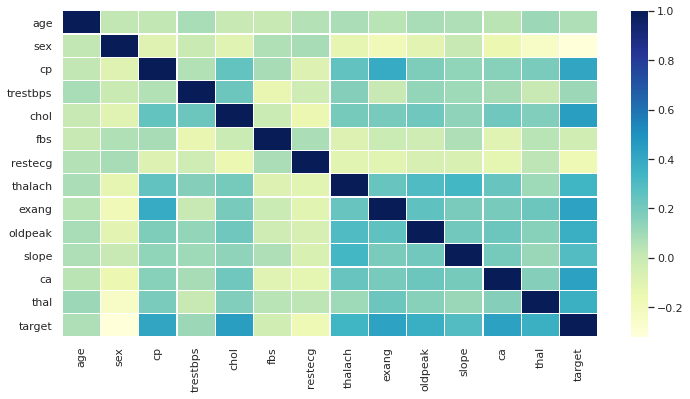

In [ ]:
#Correlación de todas la variables entre si

plt.figure(figsize=(12, 6))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

(7.5, -0.5)

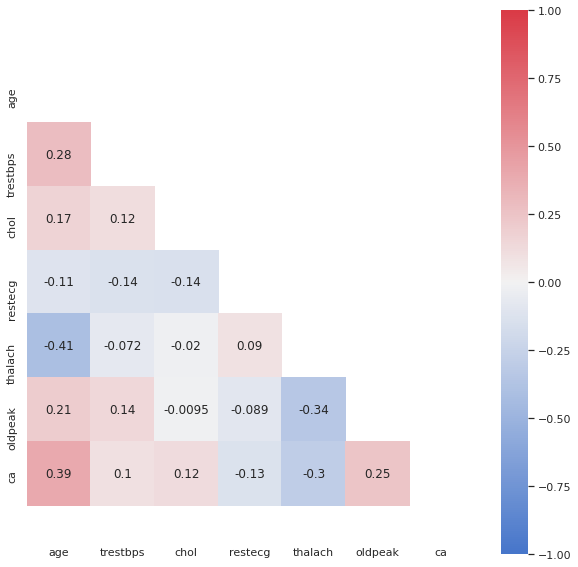

In [ ]:
# Correlation with Heatmap Visualization 
sns.set(style="white") 
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(255, 10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, annot=True, square=True, cmap=cmap,vmin=-1, vmax=1, ax=ax)  

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

# Construcción de modelos predictivos

In [ ]:

from sklearn.preprocessing import StandardScaler #lo utilizo para standarizar el modelo y correr los algoritmos

from sklearn.model_selection import train_test_split # sirve para dividir la muestra
# Importo diferentes modelos y las herramientas para medir su eficiencia
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


Preparación del dataset

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Hombre,asintomático,145,233,sí,0,150,no,2.3,ascendente,0.0,tala_control,patología
1,37,Hombre,sin_dolor_angina,130,250,no,1,187,no,3.5,ascendente,0.0,talasemia,patología
2,41,Mujer,no_frecuente_angina,130,204,no,0,172,no,1.4,descendente,0.0,talasemia,patología
3,56,Hombre,no_frecuente_angina,120,236,no,1,178,no,0.8,descendente,0.0,talasemia,patología
4,57,Mujer,angina_tipica,120,354,no,1,163,sí,0.6,descendente,0.0,talasemia,patología


In [ ]:
import io #vuelvo a cargar el dataset para tener las variable en formato número
df2 = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [ ]:
df2.head(2) #compruebo que esta de nuevo cargado y vuelvo a limpiarlo de duplicados y campos erróneos

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [ ]:
df2.loc[df2['ca']==4, 'ca'] = np.NaN #subtituyo por vacio los campos que están mal informados
df2.loc[df2['thal']==0, 'thal'] = np.NaN


In [ ]:
df2.isnull().sum() #antes no tenía nulos pero ahora sí al haber borrado los valores erróneos

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [ ]:
df2 = df2.fillna(df2.median())
df2 = df2.drop_duplicates() #elimino la línea duplicada

Dividimos el data set para entrenar los modelos

In [ ]:
y = df2["target"] #aislo la variable objetivo
X = df2.drop('target',axis=1) #el dataframe sin la variable objetivo
train_size = int(X.shape[0]*0.8) #marco el set de entranamiento y de test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #normalizo las variables para el cálculo de los algoritmo.
X_test = scaler.transform(X_test)

In [ ]:
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0


In [ ]:
#Compruebo que el set está balanceado, para estimar bien con los modelos
from collections import Counter
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 111, 1: 130})

Comienzo a pasarle diferentes algoritmos a nuestro dataset


In [ ]:
m1 = 'Regresión logística'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Precisión de la Regresión logística:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[23  4]
 [ 3 31]]


Precisión de la Regresión logística: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



Confusion matrix, without normalization
[[23  4]
 [ 3 31]]
Normalized confusion matrix
[[0.85 0.15]
 [0.09 0.91]]


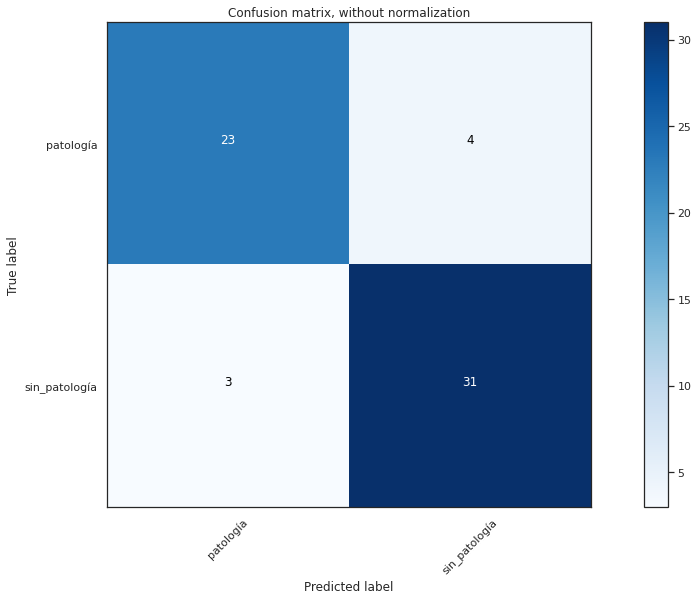

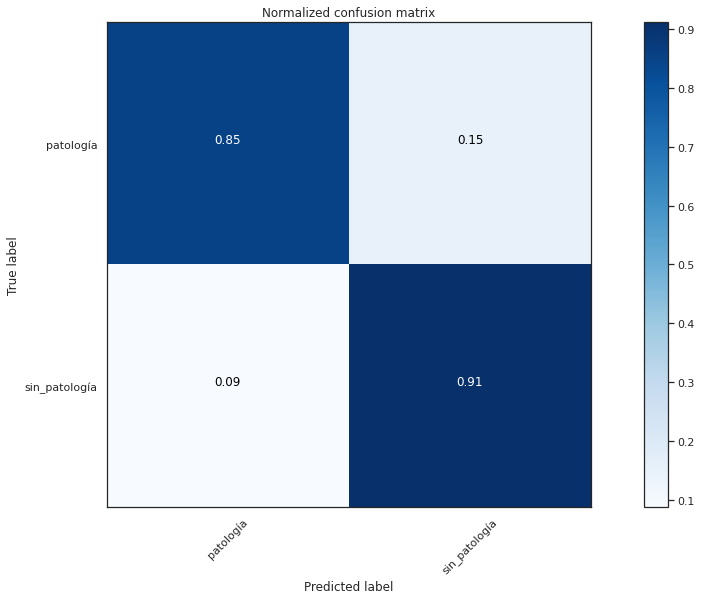

               precision    recall  f1-score   support

    patología       0.88      0.85      0.87        27
sin_patología       0.89      0.91      0.90        34

     accuracy                           0.89        61
    macro avg       0.89      0.88      0.88        61
 weighted avg       0.89      0.89      0.88        61



In [ ]:
#Usamos la confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """Esto nos permite imprimir y trazar la confusion_matrix.
    Para normalizarla a través de `normalize=True`."""
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Calculamos la confusion matrix
cnf_matrix = confusion_matrix(y_test, lr_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['patología','sin_patología']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(y_test, lr_predict, target_names=class_names)
print(eval_metrics)

In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Precisión de Naive Bayes :",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[24  3]
 [ 2 32]]


Precisión de Naive Bayes : 91.80327868852459 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.91      0.94      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



Confusion matrix, without normalization
[[24  3]
 [ 2 32]]
Normalized confusion matrix
[[0.89 0.11]
 [0.06 0.94]]


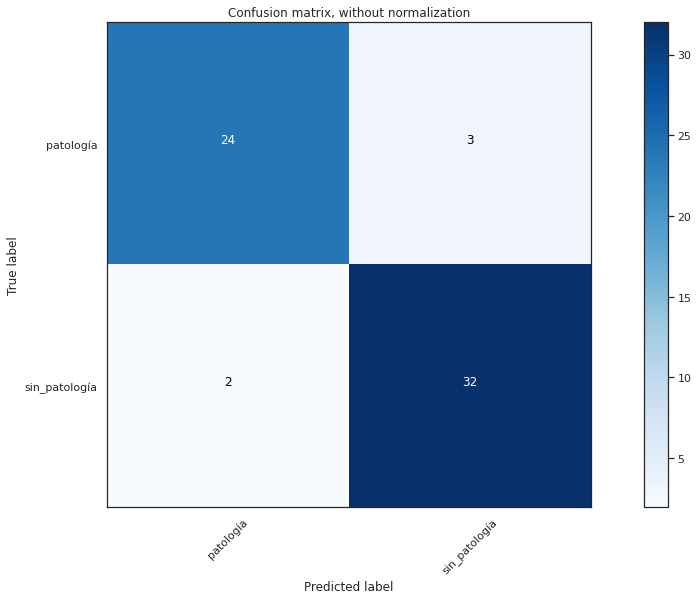

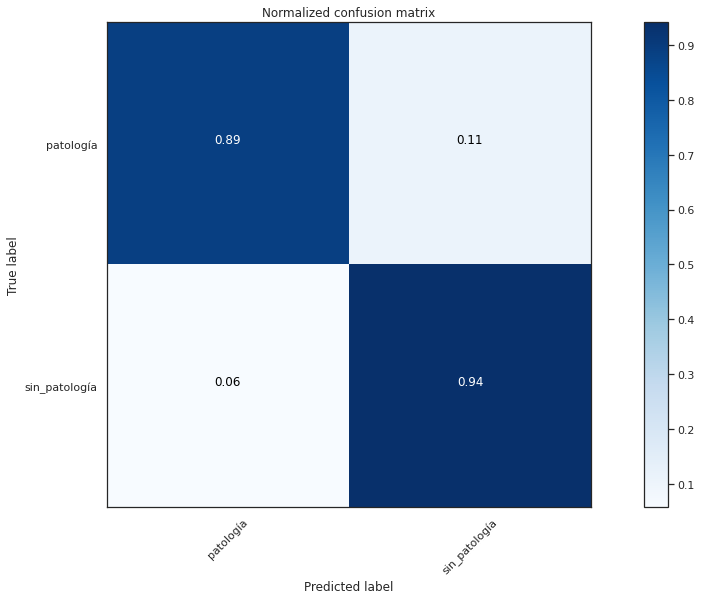

               precision    recall  f1-score   support

    patología       0.92      0.89      0.91        27
sin_patología       0.91      0.94      0.93        34

     accuracy                           0.92        61
    macro avg       0.92      0.92      0.92        61
 weighted avg       0.92      0.92      0.92        61



In [ ]:
#Usamos la confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """Esto nos permite imprimir y trazar la confusion_matrix.
    Para normalizarla a través de `normalize=True`."""
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Calculamos la confusion matrix
cnf_matrix = confusion_matrix(y_test, nbpred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['patología','sin_patología']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(y_test, nbpred, target_names=class_names)
print(eval_metrics)

In [ ]:
m3 = 'Random Forest'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Precisión de Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[25  2]
 [ 4 30]]


Precisión de Random Forest: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.94      0.88      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



Confusion matrix, without normalization
[[25  2]
 [ 4 30]]
Normalized confusion matrix
[[0.93 0.07]
 [0.12 0.88]]


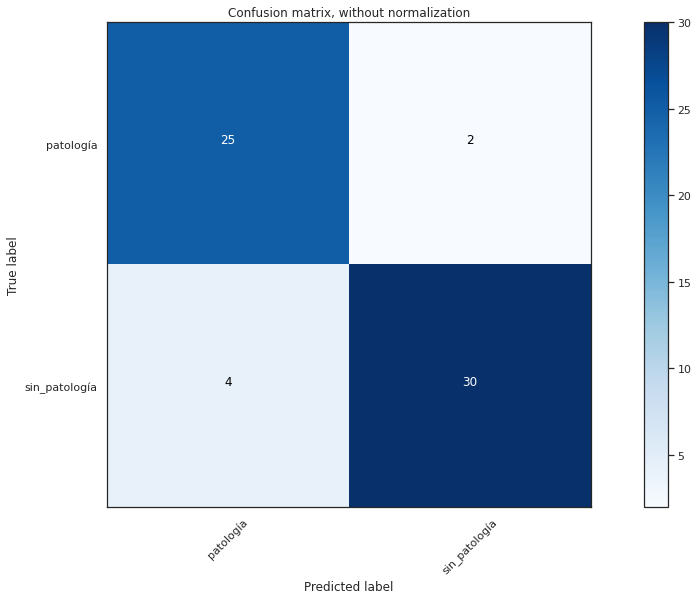

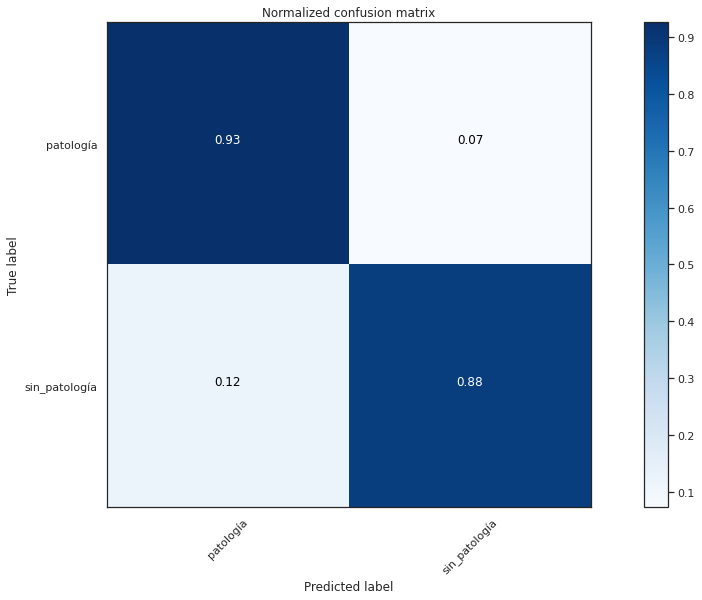

               precision    recall  f1-score   support

    patología       0.86      0.93      0.89        27
sin_patología       0.94      0.88      0.91        34

     accuracy                           0.90        61
    macro avg       0.90      0.90      0.90        61
 weighted avg       0.90      0.90      0.90        61



In [ ]:
#Usamos la confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """Esto nos permite imprimir y trazar la confusion_matrix.
    Para normalizarla a través de `normalize=True`."""
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Calculamos la confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['patología','sin_patología']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(y_test, rf_predicted, target_names=class_names)
print(eval_metrics)

In [ ]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='gbtree', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[23  4]
 [ 3 31]]


Accuracy of Extreme Gradient Boost: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



Confusion matrix, without normalization
[[23  4]
 [ 3 31]]
Normalized confusion matrix
[[0.85 0.15]
 [0.09 0.91]]


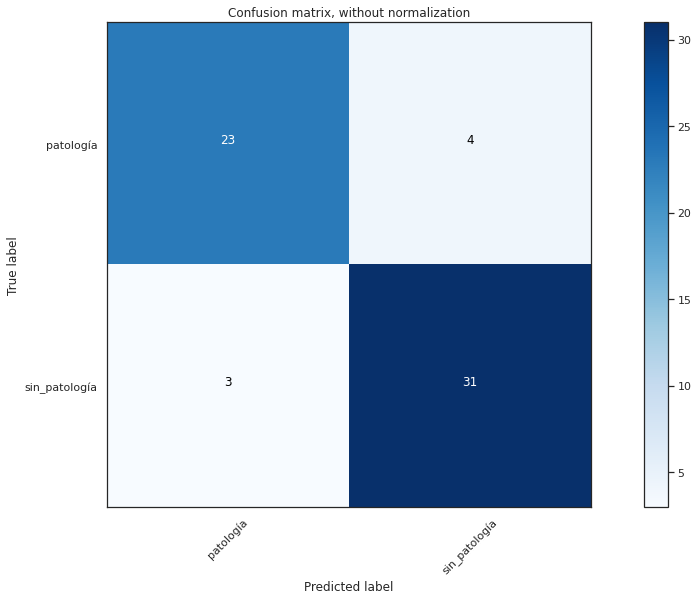

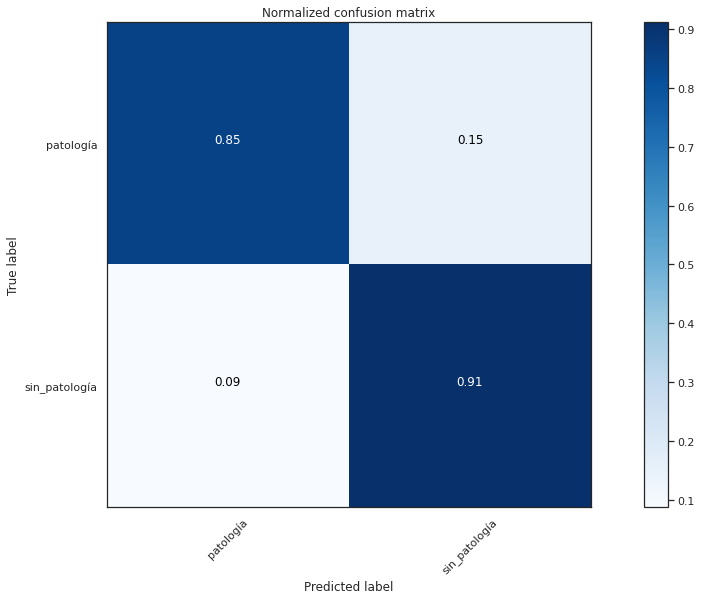

               precision    recall  f1-score   support

    patología       0.88      0.85      0.87        27
sin_patología       0.89      0.91      0.90        34

     accuracy                           0.89        61
    macro avg       0.89      0.88      0.88        61
 weighted avg       0.89      0.89      0.88        61



In [ ]:
#Usamos la confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """Esto nos permite imprimir y trazar la confusion_matrix.
    Para normalizarla a través de `normalize=True`."""
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Calculamos la confusion matrix
cnf_matrix = confusion_matrix(y_test, xgb_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['patología','sin_patología']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(y_test, xgb_predicted, target_names=class_names)
print(eval_metrics)

In [ ]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[24  3]
 [ 3 31]]


Accuracy of K-NeighborsClassifier: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



Confusion matrix, without normalization
[[24  3]
 [ 3 31]]
Normalized confusion matrix
[[0.89 0.11]
 [0.09 0.91]]


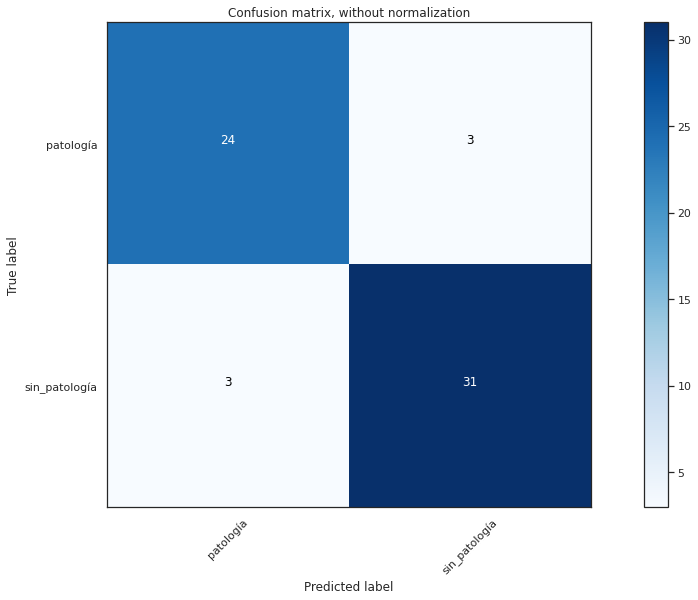

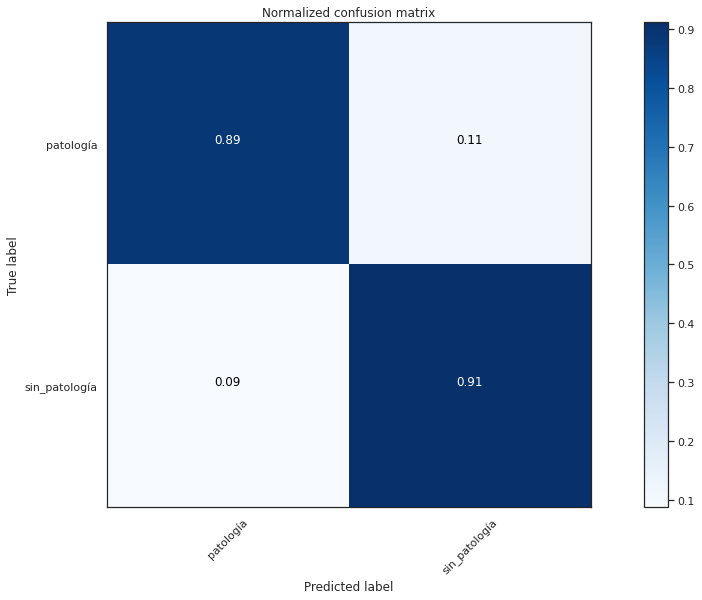

               precision    recall  f1-score   support

    patología       0.89      0.89      0.89        27
sin_patología       0.91      0.91      0.91        34

     accuracy                           0.90        61
    macro avg       0.90      0.90      0.90        61
 weighted avg       0.90      0.90      0.90        61



In [ ]:
#Usamos la confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """Esto nos permite imprimir y trazar la confusion_matrix.
    Para normalizarla a través de `normalize=True`."""
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Calculamos la confusion matrix
cnf_matrix = confusion_matrix(y_test, knn_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['patología','sin_patología']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(y_test, knn_predicted, target_names=class_names)
print(eval_metrics)

In [ ]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Precisión de  DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[17 10]
 [ 9 25]]


Precisión de  DecisionTreeClassifier: 68.85245901639344 

              precision    recall  f1-score   support

           0       0.65      0.63      0.64        27
           1       0.71      0.74      0.72        34

    accuracy                           0.69        61
   macro avg       0.68      0.68      0.68        61
weighted avg       0.69      0.69      0.69        61



Confusion matrix, without normalization
[[17 10]
 [ 9 25]]
Normalized confusion matrix
[[0.63 0.37]
 [0.26 0.74]]


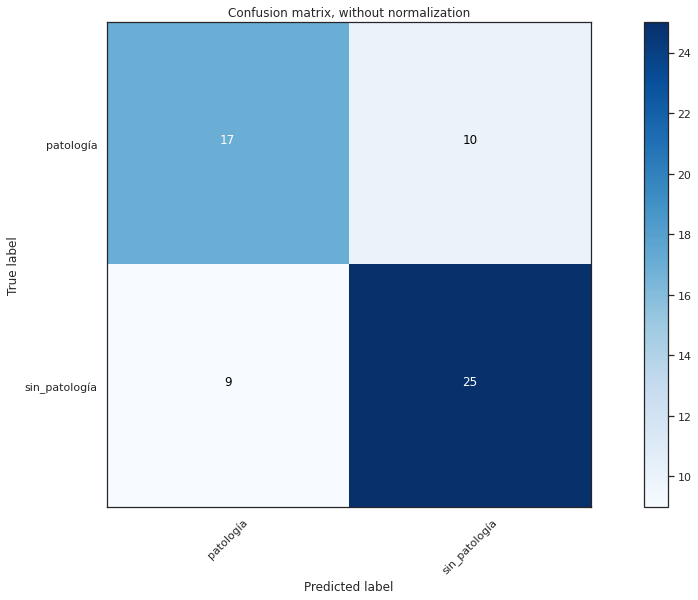

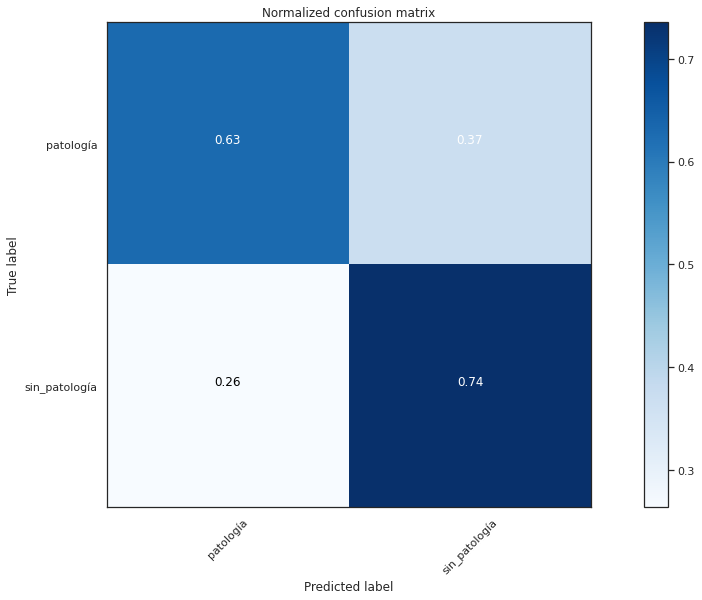

               precision    recall  f1-score   support

    patología       0.65      0.63      0.64        27
sin_patología       0.71      0.74      0.72        34

     accuracy                           0.69        61
    macro avg       0.68      0.68      0.68        61
 weighted avg       0.69      0.69      0.69        61



In [ ]:
#Usamos la confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """Esto nos permite imprimir y trazar la confusion_matrix.
    Para normalizarla a través de `normalize=True`."""
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Calculamos la confusion matrix
cnf_matrix = confusion_matrix(y_test, dt_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['patología','sin_patología']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(y_test, dt_predicted, target_names=class_names)
print(eval_metrics)

In [ ]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Precisión de Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[26  1]
 [ 3 31]]


Precisión de Support Vector Classifier: 93.44262295081968 

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.97      0.91      0.94        34

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



Confusion matrix, without normalization
[[26  1]
 [ 3 31]]
Normalized confusion matrix
[[0.96 0.04]
 [0.09 0.91]]


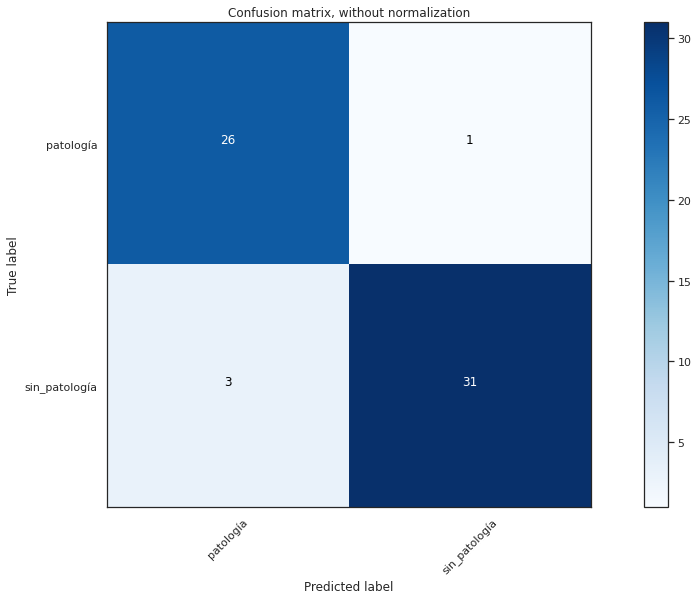

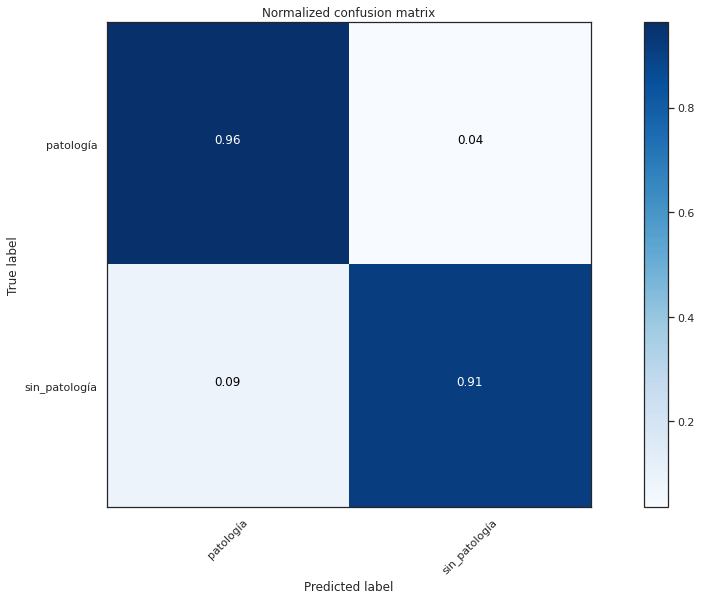

               precision    recall  f1-score   support

    patología       0.90      0.96      0.93        27
sin_patología       0.97      0.91      0.94        34

     accuracy                           0.93        61
    macro avg       0.93      0.94      0.93        61
 weighted avg       0.94      0.93      0.93        61



In [ ]:
#Usamos la confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """Esto nos permite imprimir y trazar la confusion_matrix.
    Para normalizarla a través de `normalize=True`."""
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Calculamos la confusion matrix
cnf_matrix = confusion_matrix(y_test, svc_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['patología','sin_patología']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(y_test, svc_predicted, target_names=class_names)
print(eval_metrics)

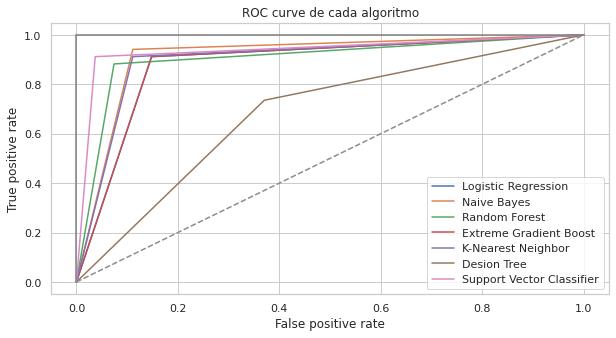

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('ROC curve de cada algoritmo')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
# Plasmamos en una tabla la precisión de cada modelo
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Precisión': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Precisión
0,Logistic Regression,88.524590
1,Naive Bayes,91.803279
2,Random Forest,90.163934
3,Extreme Gradient Boost,88.524590
4,K-Nearest Neighbour,90.163934
5,Decision Tree,68.852459
6,Support Vector Machine,93.442623


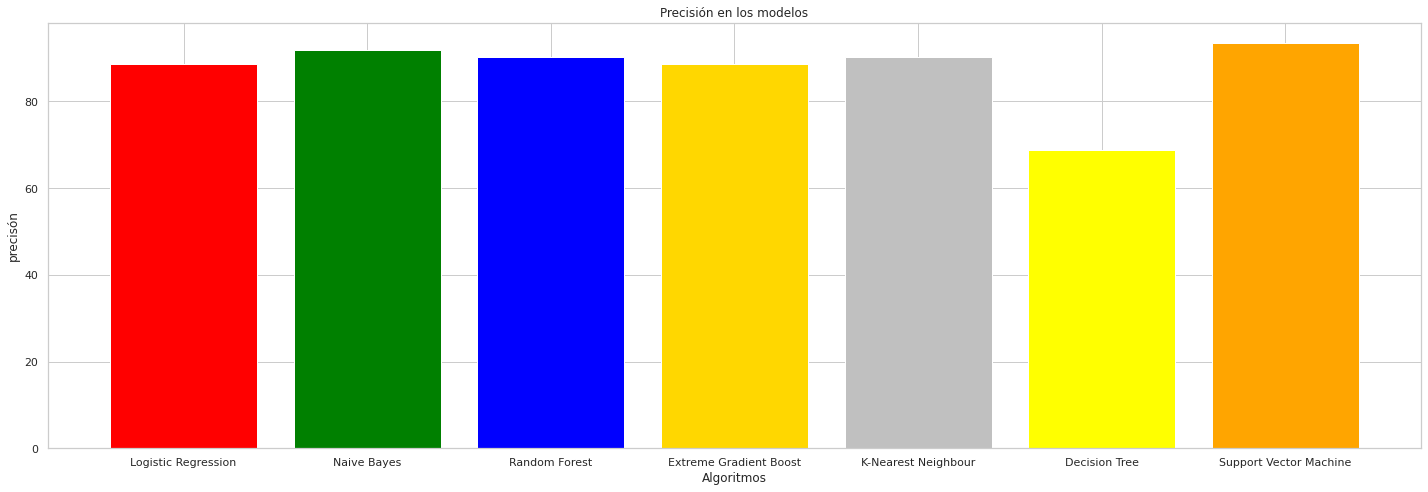

In [ ]:
# Comparo en un barplot los diferentes algoritmos
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(20,7))
plt.title("Precisión en los modelos")
plt.xlabel("Algoritmos")
plt.ylabel("precisón")
plt.bar(model_ev['Model'],model_ev['Precisión'],color = colors)

plt.tight_layout()

### Paso el mejor algoritmo al dataset original

In [ ]:
# Seleccionamos el modelo
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

df_prueba =df2

df_prueba['preds'] = np.hstack([y_pred_train, y_pred_test])

df_prueba.to_csv('df_conpred.csv', header=True, index=False)

In [ ]:
df_prueba.head(5) #vemos la predicción del modelo en el dataset original

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,preds
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1,0


# Importancia de nuestras variables

In [ ]:
pip install shap #instalo shap

     |████████████████████████████████| 327kB 5.5MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463909 sha256=bc31f853411f859e0790d223178316d1d9486b1bfa6d50edb812a49be09a575c
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [ ]:
import shap #Esta es una librería que nos permite visualizar como afectan nuestras variables a nuestros modelos



In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)

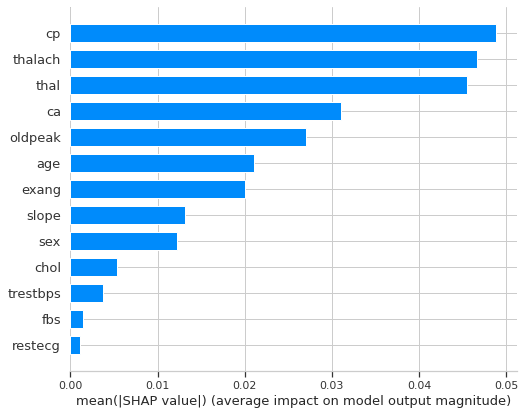

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar") #Podemos ver la importancia de las variables en el modelo Xgboost

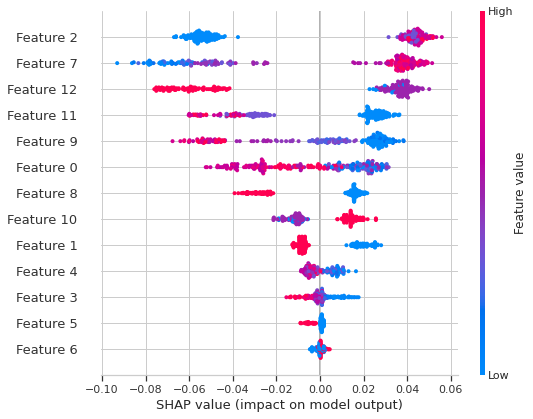

In [ ]:
shap.summary_plot(shap_values, X_train)